# session5

##### import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

##### read dataset

In [3]:
data = pd.read_csv("gender_classification_v7.csv")
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


#### label_encoder

In [4]:
le = LabelEncoder()

## decision_tree
#### make a decision tree

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
X

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [7]:
y

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.8, random_state = 0)

In [9]:
genderTree = DecisionTreeClassifier(criterion="gini",max_depth = 4)
genderTree1 = DecisionTreeClassifier(criterion="gini",max_depth = 5)
genderTree2 = DecisionTreeClassifier(criterion="gini",max_depth = 3)

In [10]:
model = genderTree.fit(X_train, y_train)
model1 = genderTree1.fit(X_train, y_train)
model2 = genderTree2.fit(X_train, y_train)

In [11]:
y_pred = genderTree.predict(X_test)
y1_pred = genderTree1.predict(X_test)
y2_pred = genderTree2.predict(X_test)

#### make a confusion matrix

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score

In [39]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("accuracy with (depth = 4) = ", ac * 100 )

accuracy with depth = 4  96.40359640359641


In [30]:
cm

array([[509,   9],
       [ 27, 456]], dtype=int64)

In [40]:
cm1 = confusion_matrix(y_test, y1_pred)
ac1 = accuracy_score(y_test, y1_pred)
print("accuracy with (depth = 3) = ", ac1 * 100 )

accuracy with (depth = 4) =  96.30369630369631


In [32]:
cm1

array([[505,  13],
       [ 24, 459]], dtype=int64)

In [41]:
cm2 = confusion_matrix(y_test, y2_pred)
ac2 = accuracy_score(y_test, y2_pred)
print("accuracy with (depth = 5) = ", ac2 * 100 )

accuracy with (depth = 4) =  96.1038961038961


In [34]:
cm2

array([[499,  19],
       [ 20, 463]], dtype=int64)

In [35]:
#f1_score
f1 = f1_score(y_test,y_pred,average=None)
print(f1.mean() * 100)
print(f1)

0.963934859366368
[0.9658444  0.96202532]


In [42]:
#f1_score
f2 = f1_score(y_test,y1_pred,average=None)
print(f2.mean() * 100)
print(f2)

96.29587402551294
[0.96466094 0.96125654]


In [43]:
#f1_score
f3 = f1_score(y_test,y2_pred,average=None)
print(f3.mean() * 100)
print(f3)

96.09885031053108
[0.96239151 0.95958549]


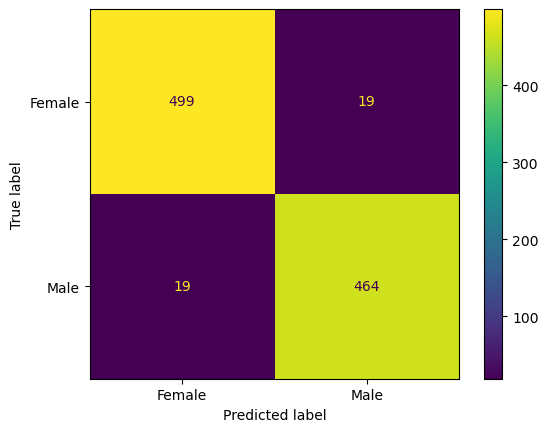

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

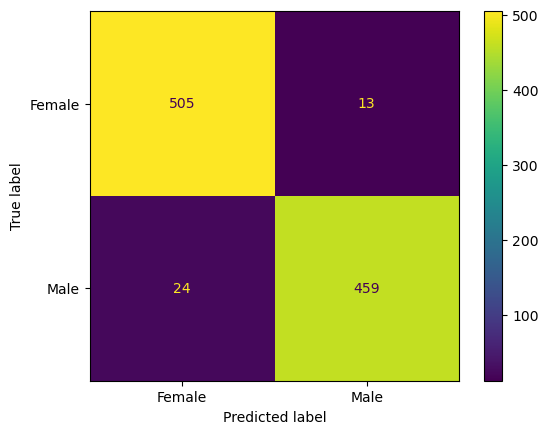

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test)

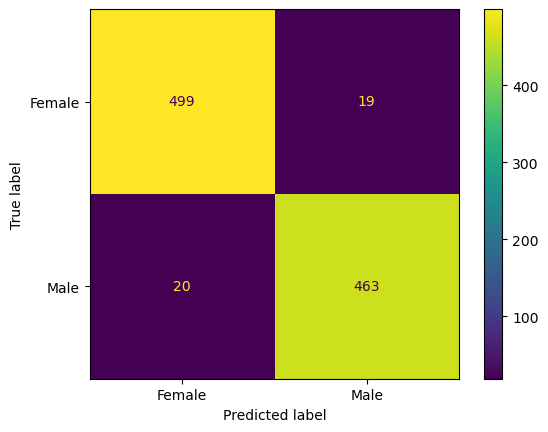

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test)

### make decision tree classifier

In [18]:
from sklearn import tree

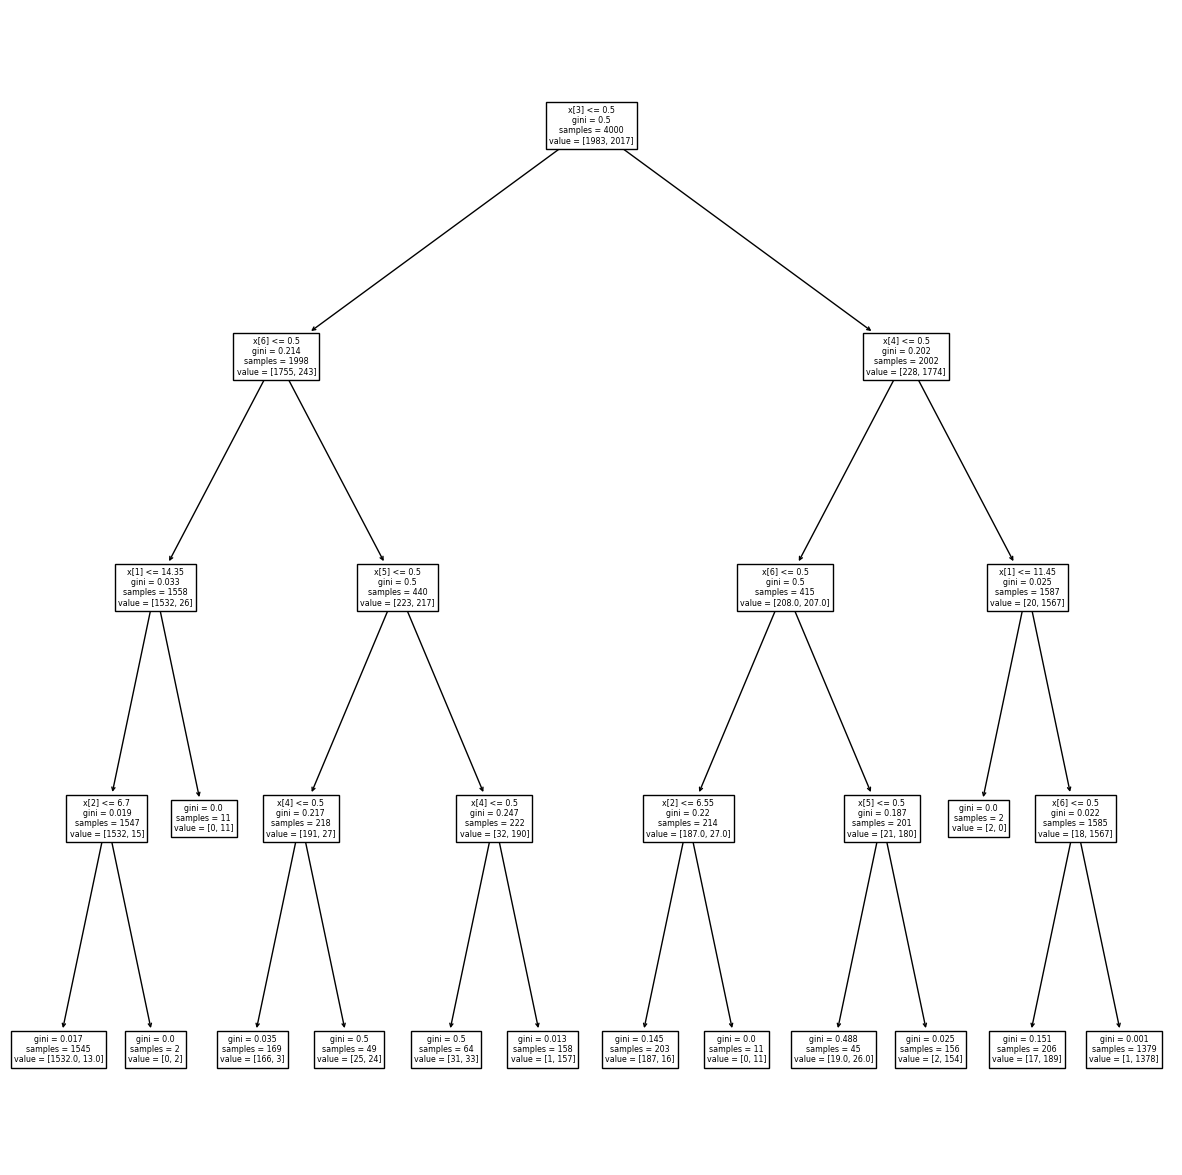

In [19]:
fige = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model)
plt.show()

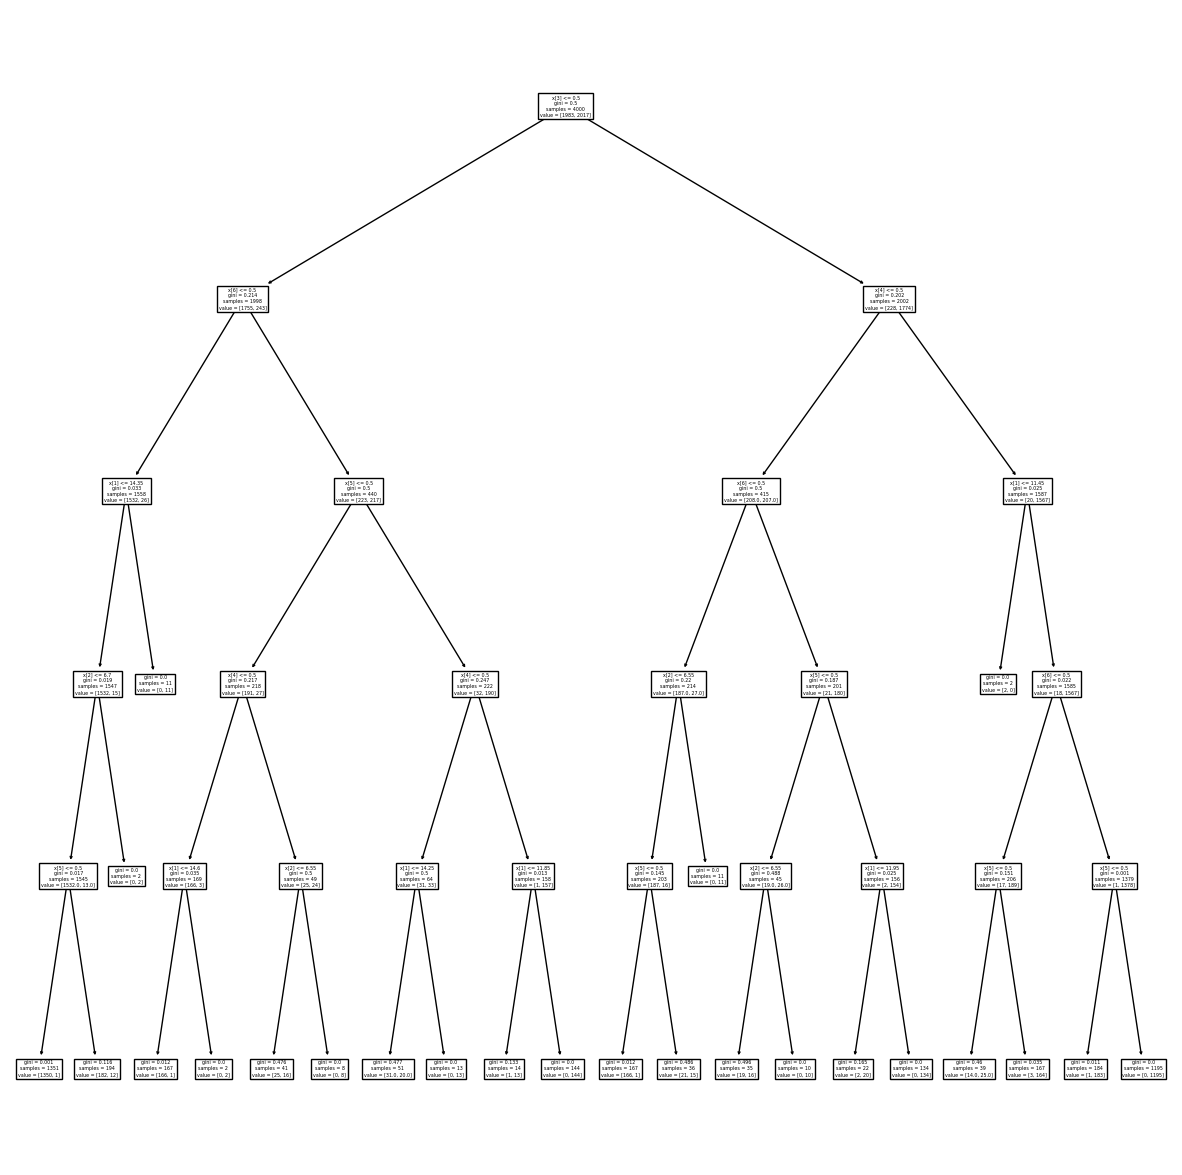

In [20]:
fige = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model1)
plt.show()

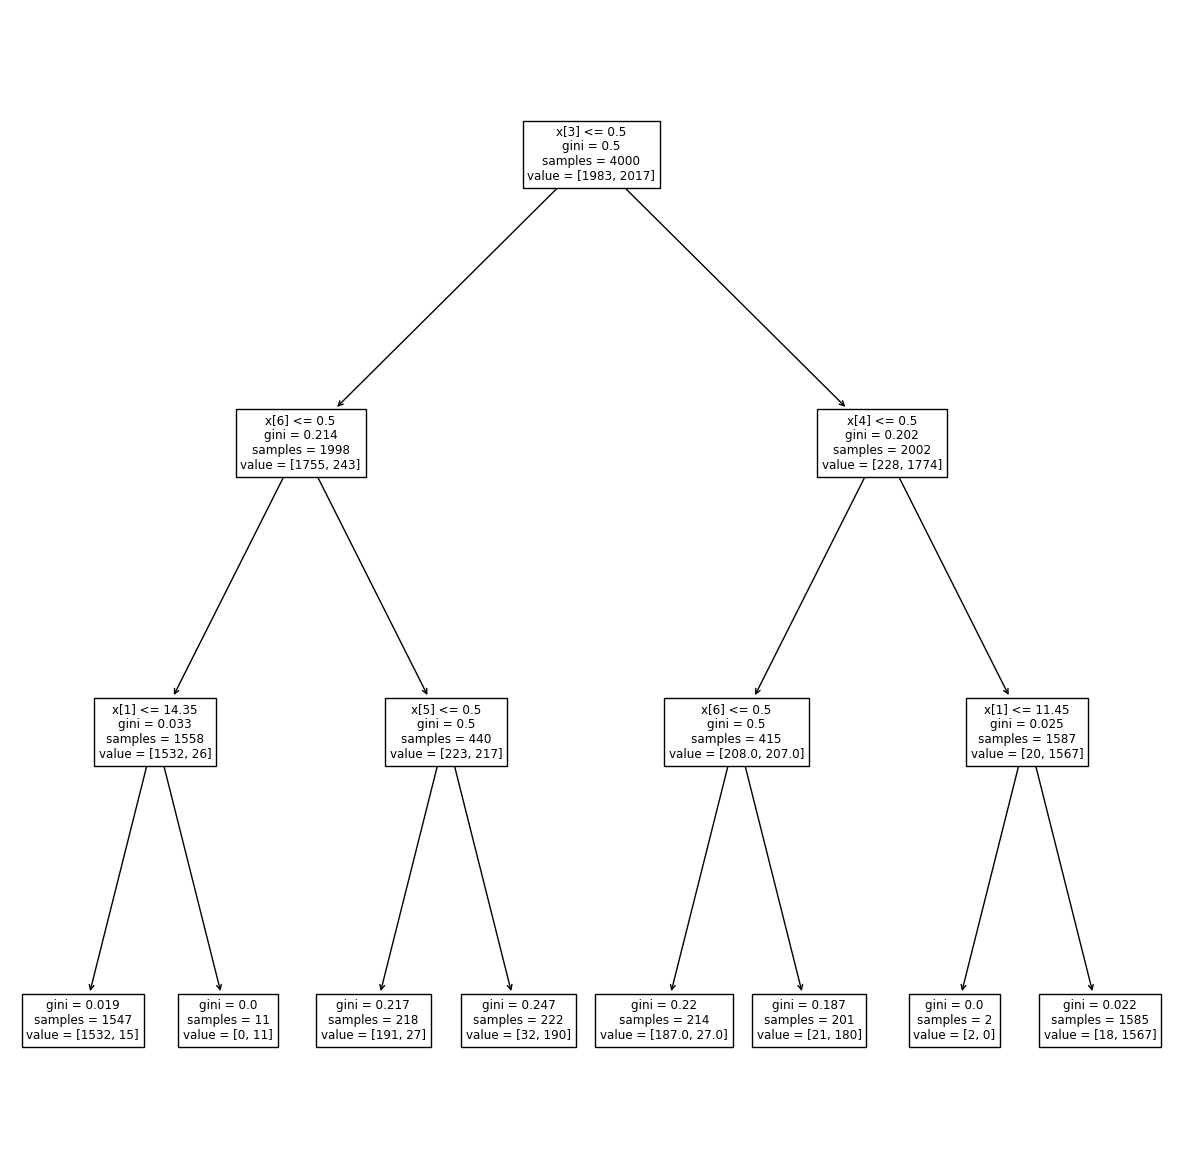

In [21]:
fige = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model2)
plt.show()

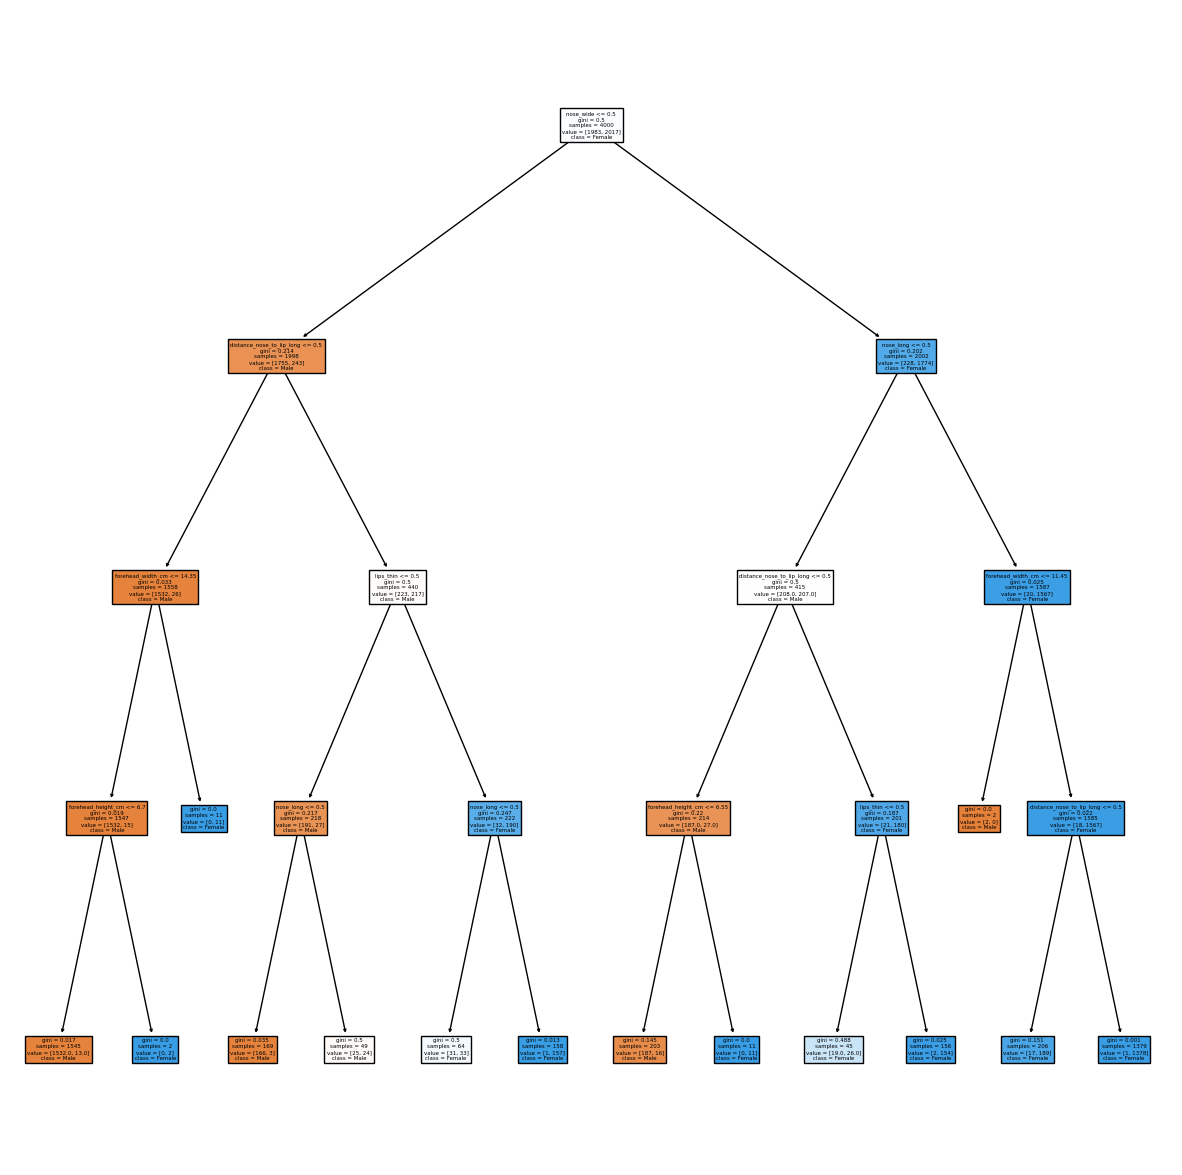

In [22]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model,
                   feature_names= data.columns,
                   class_names= data.gender.unique(),
                   filled=True)

### make a random forest classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
classifier = RandomForestClassifier(n_estimators = 2, criterion = 'gini', random_state = 0)

In [25]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[509,   9],
       [ 27, 456]], dtype=int64)

In [28]:
accuracy_score(y_test, y_pred)

0.964035964035964

In [29]:
f1 = f1_score(y_test,y_pred,average=None)
print("f1_score = ", f1)
print("f1_score = ", f1.mean())

f1_score =  [0.9658444  0.96202532]
f1_score =  0.963934859366368
